In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# load the datasets
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The different columns present in the dataset are:

* Pregnancies -> Number of times Pregnant

* Glucose -> Plasma glucose concentration

* BloodPressure -> Diastolic blood pressure (mm Hg)

* SkinThickness -> Triceps skin fold thickness (mm)

* Insulin -> 2-Hour serum insulin (mu U/ml)

* BMI -> Body Mass Index

* DiabetesPedigreeFunction -> Diabetes pedigree function

* Age -> Age in years

* Outcome -> Whether the lady is diabetic or not, 0 represents the person is not diabetic and 1 represents that the person is diabetic.



In [ ]:
print("Number of rows present in the dataset are: ", df.shape)

In [ ]:
df.info()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


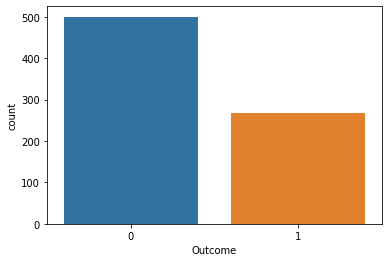

In [ ]:
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(df['Outcome'])
plt.show()

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

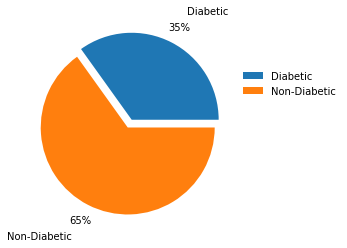

In [ ]:
fig, ax = plt.subplots()

labels = ['Diabetic',
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%',
       shadow=False, startangle=0,
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [ ]:
for col in df.columns:
    print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 0
The minimum value fore the columns BloodPressure is 0
The minimum value fore the columns SkinThickness is 0
The minimum value fore the columns Insulin is 0
The minimum value fore the columns BMI is 0.0
The minimum value fore the columns DiabetesPedigreeFunction is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


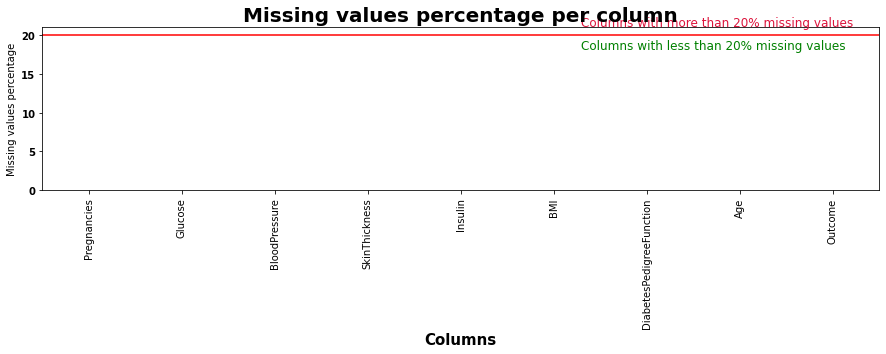

In [ ]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):

    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')

    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )

    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')

    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

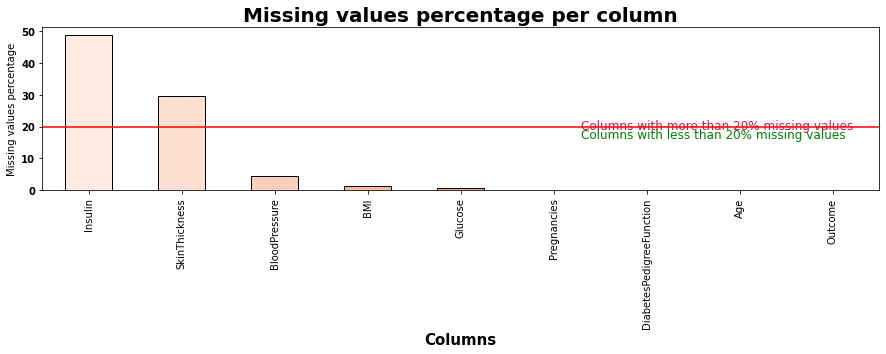

In [ ]:
msv_1(df, 20, color=sns.color_palette('Reds',15))

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


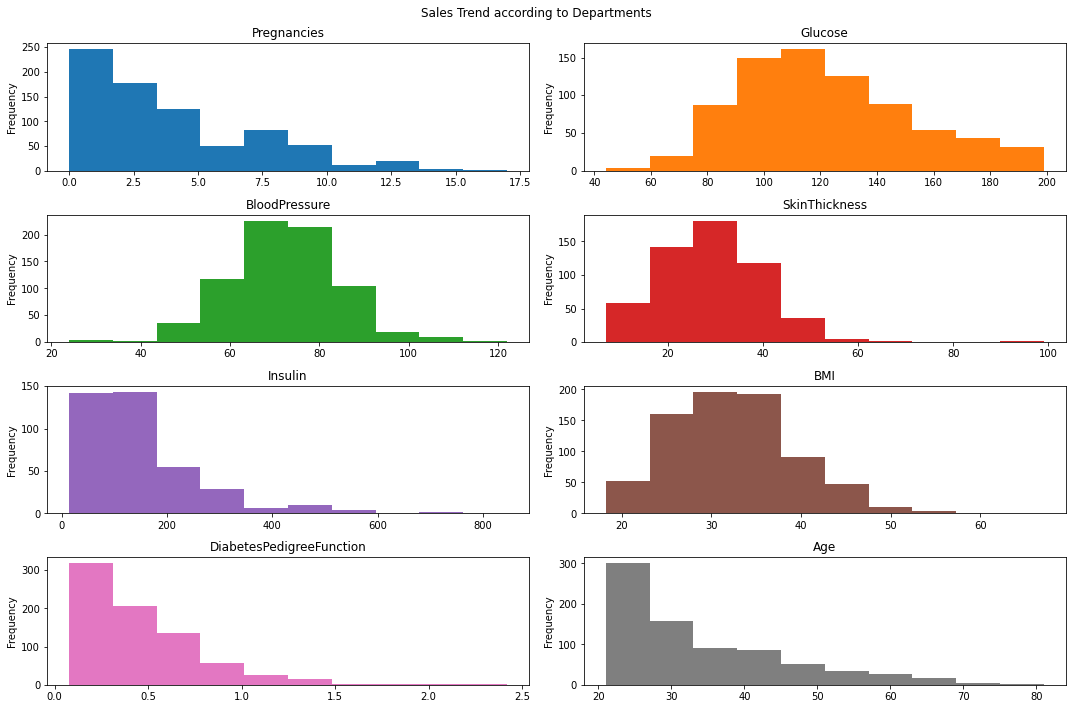

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Sales Trend according to Departments')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.5309885349396285
Skewness for the column BloodPressure is 0.13415273171959252
Skewness for the column SkinThickness is 0.690619013984192
Skewness for the column Insulin is 2.166463843812443
Skewness for the column BMI is 0.5939697505712673
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


In [ ]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median()) # Filling null values with the median.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df[col] = df[col].fillna(df[col].mean())

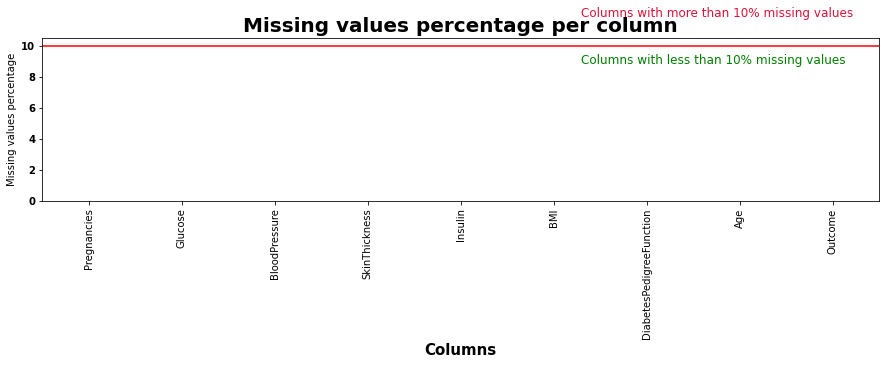

In [ ]:
msv_1(df, 10, color=sns.color_palette('Greens',15))

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**All null values are taken care of now**

In [ ]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(df.groupby('Outcome').mean()[var])

In [ ]:
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(df[col_name][df.Outcome == 1], color ="red", rug = True)
    sns.distplot(df[col_name][df.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056

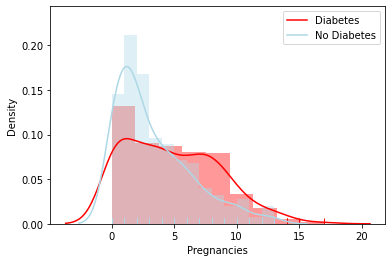

In [ ]:
distplot('Pregnancies')

In [ ]:
mean_target('Pregnancies')

,Pregnancies
Outcome,
0,3.298000
1,4.865672


**We can see that the number of pregnancies is high for the diabetic people**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056

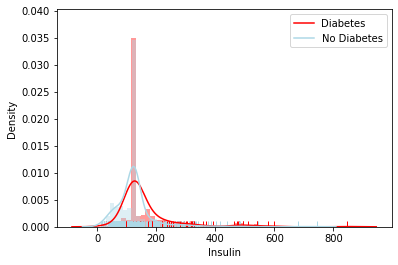

In [ ]:
distplot('Insulin')

In [ ]:
mean_target('Insulin')

,Insulin
Outcome,
0,127.792000
1,164.701493


**Diabetic People tend to have more Insulin level.**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056

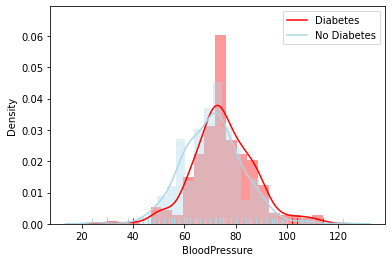

In [ ]:
distplot('BloodPressure')

In [ ]:
mean_target('BloodPressure')

,BloodPressure
Outcome,
0,70.935397
1,75.147324


**The mean of the blood pressure is greater for diabetic people as compared to the non-diabetic people**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056

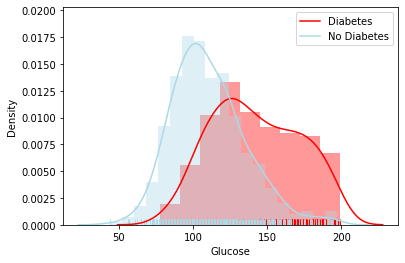

In [ ]:
distplot('Glucose')

In [ ]:
mean_target('Glucose')

,Glucose
Outcome,
0,110.710121
1,142.165573


**Diabetic People tend to have much higher Glucose level**

**Let's think like a common man, and analyze the data.**

**First, we would know what is the effect of Age on the Outcome because we have heard that as the age increases, the chances of diabetes also commonly increases.**

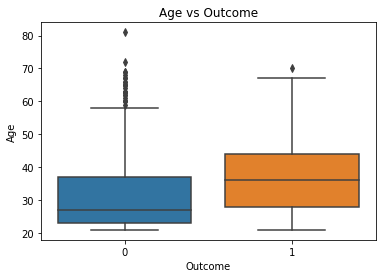

In [ ]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.title('Age vs Outcome')
plt.show()

**Yes, we were right, the median of the age of diabetic people is greater than that of non-diabetic people.**

**Let's also check the effect of Blood Pressure on the Outcome.**

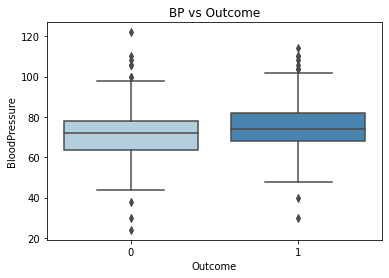

In [ ]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

**The median of the BloodPressure of diabetic people lies close to the 75th Percentile of non-diabetic people.**

**The next thing a common man would check is the relationship between age and BP**

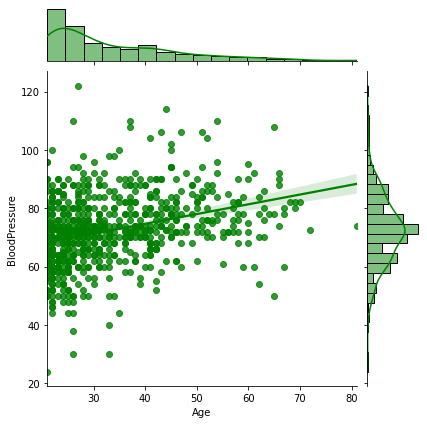

In [ ]:
sns.jointplot(x='Age',y='BloodPressure', data=df, kind = 'reg', color = 'green')

**Hmm, as the age increases, generally the Blood Pressure also increases**

**One would also want to know the chances of getting diabetes, if it is common in the family. We can check that with the Diabetes Pedigree Function.**

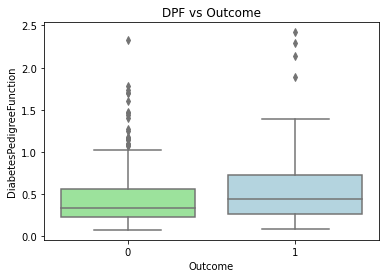

In [ ]:
my_pal = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df, palette = my_pal)
plt.title('DPF vs Outcome')
plt.show()

**Quite a proportion of people having high DPF does not end up having Diabetes.  But usually the diabetic people have DPF value close to 0.5 (50th Percentile)**

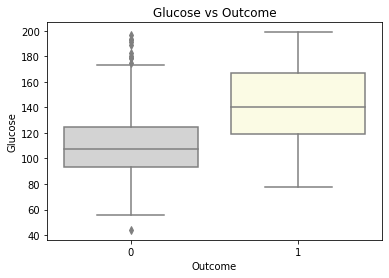

In [ ]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

**Wow! the median of the Glucose level of Diabetic People is greater than the 75th Percentile of the glucose level of non-diabetic people. Therefore having a high glucose level does increase the chances of having diabetes.**

**Let's first check whether there is any relation between glucose and insulin level.**

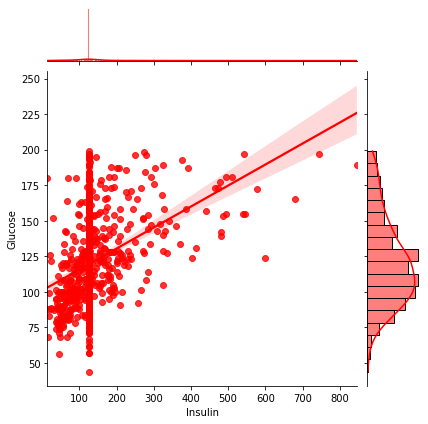

In [ ]:
sns.jointplot(x='Insulin',y='Glucose', data=df, kind = 'reg', color = 'red')
plt.show()

**We can see that as the insulin level increases, the Glucose level also increases.**

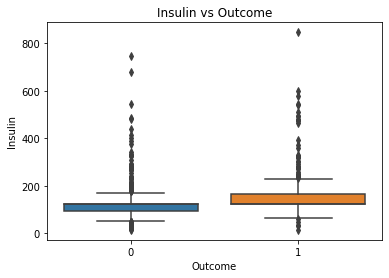

In [ ]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
plt.title('Insulin vs Outcome')
plt.show()

**Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. Does having a higher BMI leads to more chances of being diabetic? Let's check that out!**

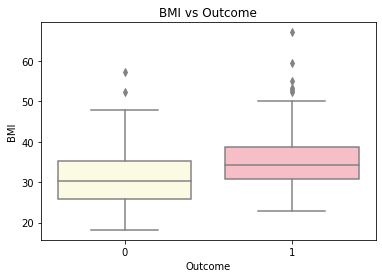

In [ ]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

**Indeed, the Median BMI of the Diabetic People is greater than the Median BMI of the Non-Diabetic people.**

<AxesSubplot:>

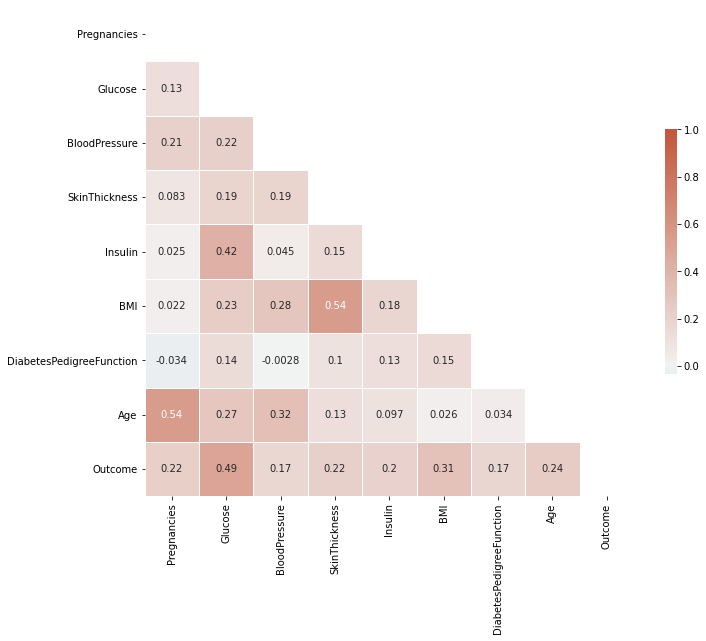

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

**From the above heatmap, we can observe that all the features are weakly correlated, so that removes multicollinearity out of equation. Multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. Models like Logistic Regression assumes the presence of non-collinearity among the features, if multicollinearity is present it can lead to the bad performance of such models.**

# Dataset Splitting and Features Scaling

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 78.99%
_______________________________________________
F1 Score: 0.66
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.803828    0.753165  0.789931    0.778496      0.786148
recall       0.896000    0.592040  0.789931    0.744020      0.789931
f1-score     0.847415    0.662953  0.789931    0.755184      0.783045
support    375.000000  201.000000  0.789931  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[336  39]
 [ 82 119]]


Test Result:
Accuracy Score: 72.40%
_______________________________________________
F1 Score: 0.56
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.760870   0.629630  0.723958    0.695250      0.715072
recall       0.840000   0.507463  0.723958    0.673731      0.723958
f1-score 

**The F1 score we got using Logistic Regression is very less, and in the Confusion Matrix it is visible that 53 wrong predictions has been made. We need to improve it.**

In [ ]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 67.19%
_______________________________________________
F1 Score: 0.52
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.742188   0.531250  0.671875    0.636719      0.668579
recall       0.760000   0.507463  0.671875    0.633731      0.671875
f1-score     0.750988   0.519084  0.671875    0.635036      0.67

**We know that Decision Tree Classifier is prone to Overfitting, and that's what we have got here. We can see that the train accuracy is 100% but the test accuracy is only 67.71%. We also know that Random Forest Classifier helps to overcome this drawback of Decision Tree Classifer. Let's check that model out.**

In [ ]:
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)

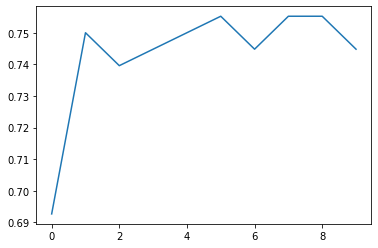

In [ ]:
from sklearn.ensemble import RandomForestClassifier
## Finding out the right number of estimators
accuracy_scores = []
for i in range(1, 1000, 100):
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
plt.plot(accuracy_scores)

**Maximum test accuracy is achieved using 500 trees**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 75.00%
_______________________________________________
F1 Score: 0.62
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.789474   0.661017      0.75    0.725245      0.744648
recall       0.840000   0.582090      0.75    0.711045      0.750000
f1-score     0.813953   0.619048      0.75    0.716501      0.74

**Here also the model has overfitted, but the test accuracy has increased to 74%. And 50 wrong predictions are being made. We can also observe that the precision, recall and F1 score is less for the diabetic people. This means that there is a lack of training instances for the outcome '1'. We will be using Cross Validation later in the notebook**

In [ ]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

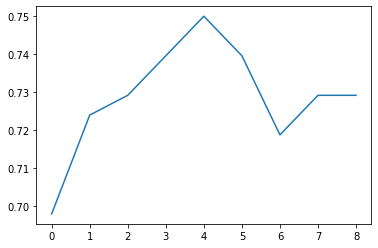

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(accuracy_scores)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 81.25%
_______________________________________________
F1 Score: 0.72
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.841432    0.751351    0.8125    0.796392      0.809998
recall       0.877333    0.691542    0.8125    0.784438      0.812500
f1-score     0.859008    0.720207    0.8125    0.789608      0.810572
support    375.000000  201.000000    0.8125  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[329  46]
 [ 62 139]]

Test Result:
Accuracy Score: 72.92%
_______________________________________________
F1 Score: 0.59
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.774436   0.627119  0.729167    0.700777      0.723028
recall       0.824000   0.552239  0.729167    0.688119      0.729167
f1-score  

In [ ]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.15)
xgb.fit(X_train, y_train)

evaluation(xgb, X_train, y_train, X_test, y_test, True)
evaluation(xgb, X_train, y_train, X_test, y_test, False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:32:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]

Test Result:
Accuracy Score: 74.48%
_______________________________________________
F1 Score: 0.63
_______________________________________________
CLASSIFICATION REPORT:
                    

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [ ]:
train_score_xgb = round(accuracy_score(y_train, xgb.predict(X_train)) * 100, 2)
test_score_xgb = round(accuracy_score(y_test, xgb.predict(X_test)) * 100, 2)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [ ]:
models = {
           'Train Accuracy': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn, train_score_xgb],
          'Test Accuracy' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn, test_score_xgb]
         }

models = pd.DataFrame(models, index = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'K-Nearest Neighbor', 'XGBoost'])
models.head()

,Train Accuracy,Test Accuracy
Logistic Regression,78.99,72.40
Decision Tree Classifier,100.00,67.19
Random Forest Classifier,100.00,75.00
K-Nearest Neighbor,81.25,72.92
XGBoost,100.00,74.48


**We can observe from the above dataframe that Decision Tree Classifier, Random Forest Classifier, and XGBoost have all overfitted the given dataset. Let's explore the results when we use Cross Validation.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


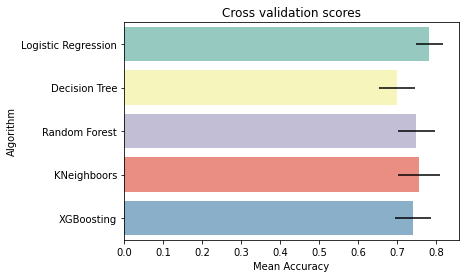

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

kfold = StratifiedKFold(n_splits=10)

random_state = 0
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state, n_estimators = 500))
classifiers.append(KNeighborsClassifier())
classifiers.append(XGBClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression","Decision Tree",
"Random Forest", "KNeighboors", "XGBoosting"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
cv_res.head()

,CrossValMeans,CrossValerrors,Algorithm
0,0.783091,0.035100,Logistic Regression
1,0.701270,0.046378,Decision Tree
2,0.750121,0.048499,Random Forest
3,0.757139,0.053968,KNeighboors
4,0.741319,0.045448,XGBoosting


**From the above table, we can observe that we get the best results for Logistic Regression Algorithm, the accuracy in the case is 78.3%. The Results for Random Forest and KNeighbors Classifer is also not bad. Let's try out Hyperparameter Tuning using GridSearchCv for Random Forest Classifier and XGBoost Classifier**

# Hyperparameter Tuning

### Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


**By Hyperparameters tuning, we get the best accuracy as 77% and the hyperparameters that give the best result are shown below.**

In [ ]:
print(RFC_best)

### XGBoost Classifier

In [ ]:
# XGBoosting Classifier tunning

XGB = XGBClassifier(verbosity = 0)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1]
              }

gsXGB = GridSearchCV(XGB, param_grid = gb_param_grid, cv=kfold, scoring="accuracy")

gsXGB.fit(X_train,y_train)

XGB_best = gsXGB.best_estimator_
# Best score
gsXGB.best_score_

In [ ]:
XGB_best